Accuracy:  0.920
Precision: 0.933
Recall:    0.920
F1 Score:  0.926

Confusion Matrix:
[[104   9]
 [ 11 126]]


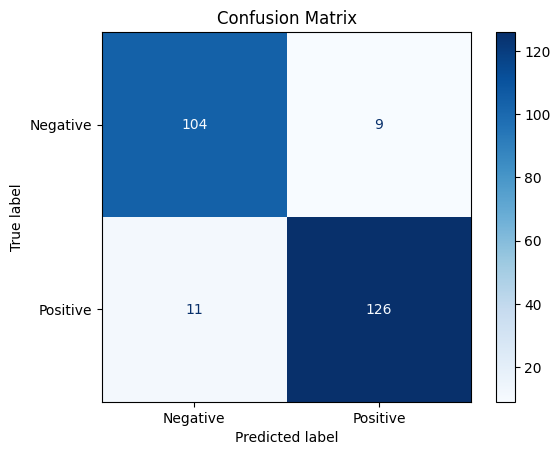

In [3]:
# Step 1: Import libraries
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay

import matplotlib.pyplot as plt

# Step 2: Create synthetic dataset (2 classes)
X, y = make_classification(n_samples=1000, n_features=5, n_informative=3, 
                           n_redundant=0, random_state=42)

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Step 4: Train a classifier
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 5: Make predictions
y_pred = model.predict(X_test)

# Step 6: Compute metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy:  {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall:    {rec:.3f}")
print(f"F1 Score:  {f1:.3f}")

# Step 7: Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display as table
print("\nConfusion Matrix:")
print(cm)

# Step 8: Visualize confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


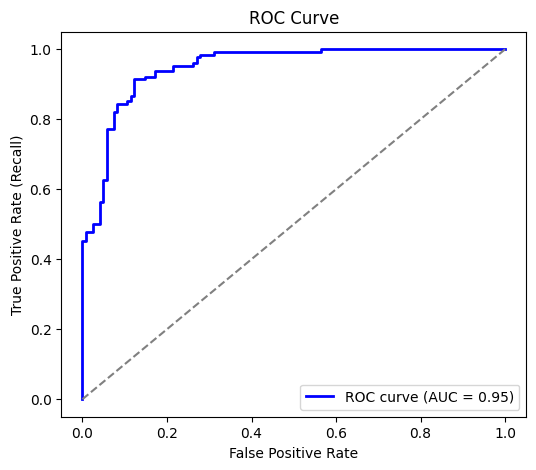

AUC Score = 0.949


In [4]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

# Step 1: Create sample dataset
X, y = make_classification(n_samples=1000, n_features=5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Step 2: Train model
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 3: Get predicted probabilities (for ROC curve)
y_prob = model.predict_proba(X_test)[:, 1]

# Step 4: Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Step 5: Plot ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # random line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

print(f"AUC Score = {roc_auc_score(y_test, y_prob):.3f}")
